In [1]:
# Importing the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#clustering Indian States Education 

In [4]:
statesedu = pd.read_excel("IndianStatesEdu.xlsx")
statesedu.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [5]:
statesedu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area Name                    35 non-null     object 
 1   Illiterate                   35 non-null     int64  
 2   Graduate & above             35 non-null     int64  
 3   Total - Population           35 non-null     int64  
 4   Percentage Illiterate        35 non-null     float64
 5   Percentage Graduate & above  35 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [6]:
statesedu.isnull().sum()

Area Name                      0
Illiterate                     0
Graduate & above               0
Total - Population             0
Percentage Illiterate          0
Percentage Graduate & above    0
dtype: int64

In [7]:
statesedu.rename(columns={"Area Name":"Area_Name", "Graduate & above":
"Graduate_above", "Total - Population": "Total_Population", "Percentage Illiterate" : "Percentage_Illiterate", "Percentage Graduate & above" :
"Percentage_Graduate_above"}, inplace=True)
statesedu.head()

,Area_Name,Illiterate,Graduate_above,Total_Population,Percentage_Illiterate,Percentage_Graduate_above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


<Axes: xlabel='Percentage_Graduate_above'>

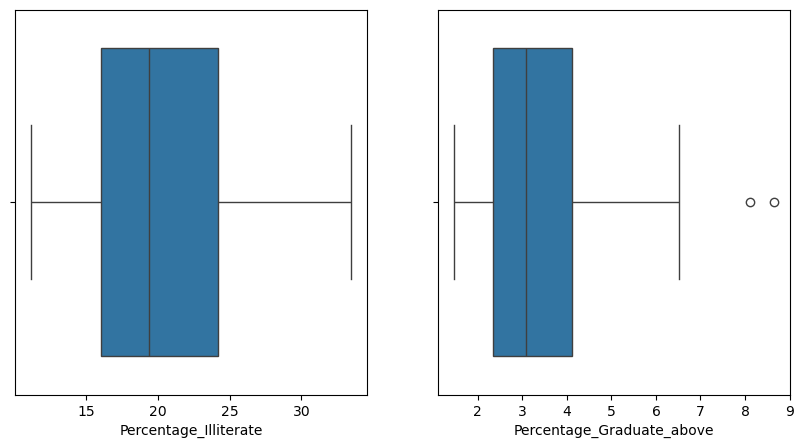

In [8]:
# Outlier check
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x=statesedu['Percentage_Illiterate'])
plt.subplot(1,2,2)
sns.boxplot(x=statesedu['Percentage_Graduate_above'])

In [10]:
grouped_statesedu =statesedu[['Area_Name','Percentage_Illiterate','Percentage_Graduate_above']]
grouped_statesedu.head()

,Area_Name,Percentage_Illiterate,Percentage_Graduate_above
0,State - JAMMU & KASHMIR,26.939133,3.073549
1,State - HIMACHAL PRADESH,14.039299,3.903154
2,State - PUNJAB,17.612390,3.530667
3,State - CHANDIGARH,16.599555,8.648065
4,State - UTTARAKHAND,19.127307,5.208069


In [11]:
grouped_statesedu.describe()

,Percentage_Illiterate,Percentage_Graduate_above
count,35.000000,35.000000
mean,20.101981,3.483161
std,5.762072,1.661141
min,11.176535,1.454525
25%,16.076337,2.333452
50%,19.405567,3.073549
75%,24.170387,4.106503
max,33.460356,8.648065


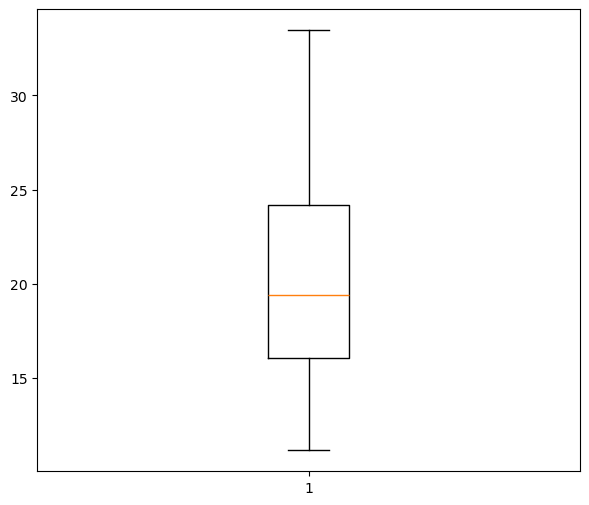

In [12]:
# checking for outliers
plt.figure(figsize = [7,6])
plt.boxplot(grouped_statesedu['Percentage_Illiterate'])
plt.show()

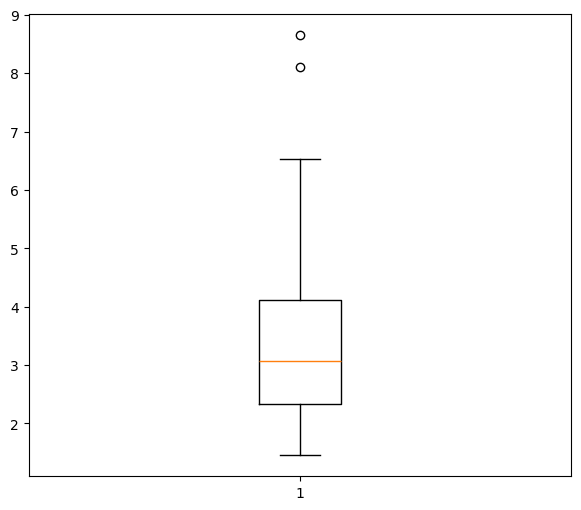

In [13]:
# checking for outliers
plt.figure(figsize = [7,6])
plt.boxplot(grouped_statesedu['Percentage_Graduate_above'])
plt.show()

In [14]:
# Creating the clusters
import sklearn
from sklearn.preprocessing import StandardScaler

In [15]:
# Need to scale the data before performing any analysis.
statesedu =grouped_statesedu[['Percentage_Illiterate','Percentage_Graduate_above']]
scaler = StandardScaler()
statesedu_scaled = scaler.fit_transform(statesedu)


In [16]:
statesedu_scaled = pd.DataFrame(statesedu_scaled)
statesedu_scaled.columns = ['Percentage_Illiterate','Percentage_Graduate_above']
statesedu_scaled.head()

,Percentage_Illiterate,Percentage_Graduate_above
0,1.203902,-0.250185
1,-1.067532,0.256526
2,-0.438373,0.029016
3,-0.616716,3.154645
4,-0.171623,1.053547


In [17]:
# Build the KMeans Clusters , making an assumption that K = 4
# Build the KMeans Clusters , making an assumption that K = 4 random k = 4 assumptions
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, max_iter=50, random_state = 42)
kmeans.fit(statesedu_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=42)

In [18]:
# 4 clustes created k = 4: 0,1,2,3
kmeans.labels_

array([3, 2, 2, 1, 0, 0, 1, 3, 3, 3, 2, 3, 0, 0, 0, 2, 3, 3, 0, 3, 0, 0,
       3, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2])

In [19]:
# Elbow Method
ssd =[]
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50, random_state = 42)
    kmeans.fit(statesedu_scaled)
    ssd.append(kmeans.inertia_)

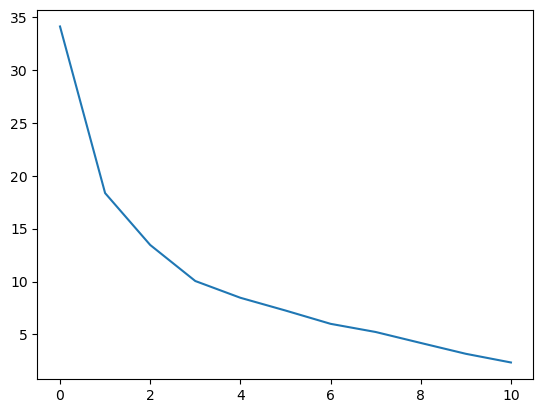

In [20]:
plt.plot(ssd)

In [21]:
# Now that we understand that we need 3 clusters by looking at the avg score and elbow method
kmeans = KMeans(n_clusters = 4, max_iter=50, random_state = 42)
kmeans.fit(statesedu_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=42)

In [53]:
grouped_statesedu['Cluster_id'] = kmeans.labels_
grouped_statesedu.sort_values(by='Cluster_id',ascending=True)

,Area_Name,Percentage_Illiterate,Percentage_Graduate_above,Cluster_id
12,State - NAGALAND,23.431414,2.972855,0
23,State - GUJARAT,19.405567,2.777670,0
21,State - CHHATTISGARH,22.604229,2.115450,0
20,State - ODISHA,20.667184,2.179054,0
27,State - ANDHRA PRADESH,19.732626,4.068508,0
18,State - WEST BENGAL,19.073510,2.393826,0
14,State - MIZORAM,19.435639,2.502538,0
13,State - MANIPUR,21.548333,3.646797,0
25,State - DADRA & NAGAR HAVELI,23.239717,3.316468,0
4,State - UTTARAKHAND,19.127307,5.208069,0
